### Actionable Insights: 
### 1) Find that, integrated over time, most exports to low and middle income countries in the Middle East and North Africa come from other countries in that area, even though historically that was not always true. The effects of things like regime change (like the rule of Saddam Hussein, Assad and Erdogan) also seem correlated with this metric
### 2) Find that average greenhouse gas emission per person from 1970-2012 is higher for more economically disadvantaged countries. For economically well off countries that have a high average rate of emission per person in this time range, most had highs in the 1970s and subsequently have decreased dramatically. The US rate remains problematically high.

#### Time allocations
#### 1st hour - Investigate data from http://data.worldbank.org/data-catalog/world-development-indicators, make some basic plots looking at the distributions and thinking about the problem
#### 2nd hour - Choose what problem I want to try to solve and start cleaning the data so that I can answer the question I want. Determine if there may be some data external to this set that would be useful
#### 3rd hour - Determine what my story is and make the first write up of my actionable insights
#### 4th hour - Consider more complicated analysis or other questions/insights I might get from the data
#### 5th hour - Finalize plots and insights

In [1]:
import pandas as pd
import seaborn as sns
import numpy
import matplotlib

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
wdi_data = pd.read_csv('data/WDI_Data.csv')

In [3]:
wdi_data.keys()

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code', u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967', u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975', u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983', u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015'], dtype='object')

In [4]:
years = ['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969',
                                            '1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
                                            '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
                                            '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
                                            '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
                                            '2010','2011','2012','2013','2014','2015']

In [5]:
indicators = wdi_data['Indicator Name'].unique()

#### Looking at the data, there is clearly too much information to analyze it all. The time range is over the course of 55 years, and there are over 1400 indicators! Therefore I try different methods to determine what are some of the main indicators in the data

In [6]:
print len(indicators),indicators

1410 ['2005 PPP conversion factor, GDP (LCU per international $)'
 '2005 PPP conversion factor, private consumption (LCU per international $)'
 'Access to electricity (% of population)' ...,
 'Women who were first married by age 18 (% of women ages 20-24)'
 "Women's share of population ages 15+ living with HIV (%)"
 'Youth literacy rate, population 15-24 years, both sexes (%)']


#### Just from visibly scanning the data it is clear that metrics about men and women are common. So first I look at what male and female indicators exist

In [7]:
female_indicators = [i for i in indicators if(('Woman' in i) or ('woman' in i) or ('Women' in i) or ('women' in i) \
                     or ('female' in i) or ('Female' in i))]

In [8]:
male_indicators = [i for i in indicators if((' Man' in i) or (' man ' in i) or (' Men' in i) or (' men' in i) \
                     or (' male' in i) or (' Male' in i))]

#### Generally male and female segregated indicators have to do with employment, education, and medical/population issues like HIV, condom use, and birth rate

In [9]:
print len(female_indicators),female_indicators

125 ['Account at a financial institution, female (% age 15+) [ts]', 'Adjusted net enrollment rate, primary, female (% of primary school age children)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Adolescents out of school, female (% of female lower secondary school age)', 'Average working hours of children, study and work, female, ages 7-14 (hours per week)', 'Average working hours of children, working only, female, ages 7-14 (hours per week)', 'Child employment in agriculture, female (% of female economically active children ages 7-14)', 'Child employment in manufacturing, female (% of female economically active children ages 7-14)', 'Child employment in services, female (% of female economically active children ages 7-14)', 'Children in employment, female (% of female children ages 7-14)', 'Children in employment, self-employed, female (% of female children in employment, ages 7-14)', 'Children in employment, study and work, female (% of female children in emplo

In [10]:
print len(male_indicators),male_indicators

88 ['Account at a financial institution, male (% age 15+) [ts]', 'Adjusted net enrollment rate, primary, male (% of primary school age children)', 'Adolescents out of school, male (% of male lower secondary school age)', 'Average working hours of children, study and work, male, ages 7-14 (hours per week)', 'Average working hours of children, working only, male, ages 7-14 (hours per week)', 'Child employment in agriculture, male (% of male economically active children ages 7-14)', 'Child employment in manufacturing, male (% of male economically active children ages 7-14)', 'Child employment in services, male (% of male economically active children ages 7-14)', 'Children in employment, male (% of male children ages 7-14)', 'Children in employment, self-employed, male (% of male children in employment, ages 7-14)', 'Children in employment, study and work, male (% of male children in employment, ages 7-14)', 'Children in employment, unpaid family workers, male (% of male children in employ

#### Separate out all the words in the indicators and then find the most frequent terms. From this I see that the common indicators (besides gender),  are things like agricultural work, manufacturing and trade, and energy

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import re
clean_indicators = [re.sub("[^a-zA-Z]"," ",j).lower() for j in indicators]
wdi_vectorizer = CountVectorizer(stop_words='english',max_features=200)
wdi_wordcounts = wdi_vectorizer.fit_transform(clean_indicators)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [12]:
word_freqs = zip(numpy.asarray(wdi_wordcounts.sum(axis=0)).ravel(),wdi_vectorizer.get_feature_names())
word_freqs.sort(reverse=True)

In [13]:
print word_freqs

[(381, u'current'), (207, u'total'), (139, u'female'), (133, u'net'), (122, u'male'), (100, u'population'), (100, u'employment'), (99, u'debt'), (93, u'ages'), (92, u'rate'), (92, u'ppg'), (88, u'children'), (87, u'primary'), (86, u'lcu'), (86, u'expenditure'), (86, u'education'), (83, u'gdp'), (74, u'exports'), (67, u'external'), (65, u'services'), (65, u'income'), (64, u'constant'), (60, u'imports'), (59, u'merchandise'), (57, u'flows'), (56, u'secondary'), (54, u'labor'), (54, u'gross'), (54, u'consumption'), (50, u'private'), (48, u'force'), (48, u'estimate'), (47, u'low'), (46, u'value'), (45, u'age'), (44, u'ratio'), (44, u'bilateral'), (43, u'official'), (42, u'goods'), (41, u'national'), (41, u'bop'), (37, u'unemployment'), (36, u'school'), (36, u'emissions'), (36, u'creditors'), (36, u'capita'), (35, u'service'), (35, u'gni'), (35, u'annual'), (35, u'added'), (34, u'high'), (34, u'commercial'), (34, u'aid'), (33, u'international'), (32, u'savings'), (32, u'final'), (31, u'publ

In [14]:
ag_indicators = [i for i in indicators if('agricult' in i.lower())]

In [15]:
print len(ag_indicators),ag_indicators

29 ['Agricultural irrigated land (% of total agricultural land)', 'Agricultural land (% of land area)', 'Agricultural land (sq. km)', 'Agricultural machinery, tractors', 'Agricultural machinery, tractors per 100 sq. km of arable land', 'Agricultural methane emissions (% of total)', 'Agricultural methane emissions (thousand metric tons of CO2 equivalent)', 'Agricultural nitrous oxide emissions (% of total)', 'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 'Agricultural raw materials exports (% of merchandise exports)', 'Agricultural raw materials imports (% of merchandise imports)', 'Agriculture value added per worker (constant 2010 US$)', 'Agriculture, value added (% of GDP)', 'Agriculture, value added (annual % growth)', 'Agriculture, value added (constant 2010 US$)', 'Agriculture, value added (constant LCU)', 'Agriculture, value added (current LCU)', 'Agriculture, value added (current US$)', 'Annual freshwater withdrawals, agriculture (% of total fres

In [16]:
energy_indicators = [i for i in indicators if(('oil' in i.lower()) or ('electricity' in i.lower()) or \
                                              ('gas' in i.lower()) or ('fuel' in i.lower()))]

In [17]:
print len(energy_indicators),energy_indicators

46 ['Access to electricity (% of population)', 'Access to electricity, rural (% of rural population)', 'Access to electricity, urban (% of urban population)', 'Access to non-solid fuel (% of population)', 'Access to non-solid fuel, rural (% of rural population)', 'Access to non-solid fuel, urban (% of urban population)', 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)', 'CO2 emissions from gaseous fuel consumption (% of total)', 'CO2 emissions from gaseous fuel consumption (kt)', 'CO2 emissions from liquid fuel consumption (% of total)', 'CO2 emissions from liquid fuel consumption (kt)', 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)', 'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)', 'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)', 'CO2 emissions from solid fuel 

In [18]:
trade_manufact_indicators = [i for i in indicators if(('export' in i.lower()) or ('import' in i.lower()) \
                                             or ('tariff' in i.lower()) or ('merchandise' in i.lower())) \
                                             or('manufact' in i.lower())]

In [19]:
print len(trade_manufact_indicators),trade_manufact_indicators

148 ['Agricultural raw materials exports (% of merchandise exports)', 'Agricultural raw materials imports (% of merchandise imports)', 'Arms exports (SIPRI trend indicator values)', 'Arms imports (SIPRI trend indicator values)', 'Average time to clear exports through customs (days)', 'Binding coverage, manufactured products (%)', 'Bound rate, simple mean, manufactured products (%)', 'Chemicals (% of value added in manufacturing)', 'Child employment in manufacturing (% of economically active children ages 7-14)', 'Child employment in manufacturing, female (% of female economically active children ages 7-14)', 'Child employment in manufacturing, male (% of male economically active children ages 7-14)', 'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)', 'Commercial service exports (current US$)', 'Commercial service imports (current US$)', 'Communications, computer, etc. (% of service exports, BoP)', 'Communications, computer, etc. (% of service i

#### I decided to consider examining a few interesting indicators: 'Merchandise imports from economies in the Arab World (% of total merchandise imports)', 'Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)', 'Nonpregnant and nonnursing women can do the same jobs as men (1=yes; 0=no)','Condom use, population ages 15-24, male (% of males ages 15-24)','Employment in agriculture (% of total employment)','Total greenhouse gas emissions (kt of CO2 equivalent)','Arms imports (SIPRI trend indicator values)','Food imports (% of merchandise imports)'

#### In the end I decided to investigate two of these indicators.  'Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)' and 'Total greenhouse gas emissions (kt of CO2 equivalent)'

In [20]:
me_na_exports = wdi_data[wdi_data['Indicator Name']==\
         'Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)']

In [21]:
#See that 2015 is missing for this dataset so I just remove it from years
me_na_export_values = me_na_exports[years[:-1]].transpose()
me_na_export_countries = me_na_exports['Country Name']
me_na_export_values.columns = list(me_na_export_countries)

#### The data is missing some other years of data for some of the entries, and for some countries there is no data at all. I find that by interpolating the data forward in time, backfilling the data backwards in time, and removing columns that contain only NaN values that I am left with a dataset with no NaN values.

In [22]:
print len(me_na_export_values.isnull().values)

55


In [23]:
me_na_export_int = me_na_export_values.apply(pd.Series.interpolate)

In [24]:
me_na_export_int.isnull().values.any()

True

In [25]:
me_na_export_bfill = me_na_export_values.bfill()

In [26]:
me_na_export_bfill.isnull().values.any()

True

In [27]:
me_na_export_new=me_na_export_bfill.dropna(axis=1,how='all')

In [28]:
me_na_export_new.isnull().values.any()

False

#### In looking at both 'Arab World' and 'Middle East & North Africa' I see that the trends are nearly identical. This makes me suspect that these columns probably contain many of the same countries. Also see that historically the rate of trade between different countries in the Arab World was low, but since 1980 it has been increasing steadily

In [29]:
arab_exports = me_na_export_values['Arab World']

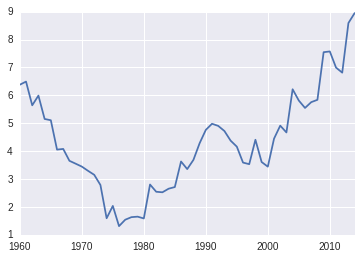

In [30]:
arab_exports.plot()

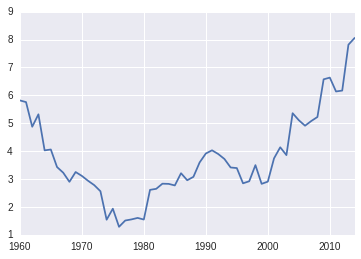

In [31]:
me_na_export_new['Middle East & North Africa'].plot()

#### The trade between the United States and the Arab World has a suspicious spike in the 1970s, and has subsequently dropped to almost nothing

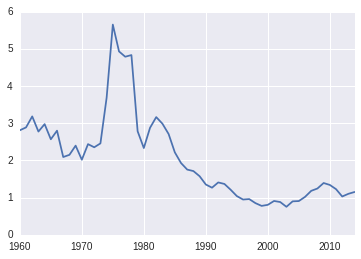

In [32]:
me_na_export_new['United States'].plot()

#### The suspicious spike for Euro area countries continues from the 1970s to the end of the 1980s before dropping

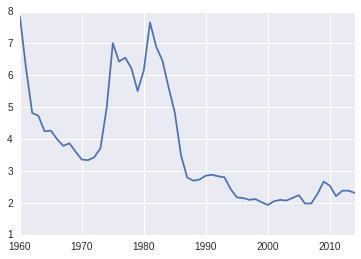

In [33]:
me_na_export_new['Euro area'].plot()

#### Use the mean trade for all the countries in the period from 1960-2014 to try and determine what countries have historically had high trade with the Arab World

In [34]:
basic_stats = me_na_export_new.describe(percentiles=[0,.68,.95,.999])

In [35]:
country_means = [(basic_stats[k].mean(),k) for k in basic_stats.keys()]

#### See that many countries with well known conflicts are at the top of this list (Iraq, Syria, Ethiopia, Somalia,Cuba). France is also on the list, which may be because of all the colonies they previously had and may still be somewhat involved with in North Africa

In [36]:
country_means.sort(reverse=True)
print country_means[:20]

[(39.505469180130248, 'Iraq'), (34.562203651320331, 'Syrian Arab Republic'), (31.950070228864785, 'Jordan'), (27.021942119997796, 'Lebanon'), (22.393436621069306, 'Turkey'), (22.026190052575544, 'Ethiopia'), (21.18457787562906, 'Cyprus'), (20.840358074919699, 'Azerbaijan'), (20.405770592567116, 'Djibouti'), (20.213491725996825, 'Somalia'), (20.161395073290276, 'Benin'), (19.37456769522618, 'Central African Republic'), (19.020360718160582, 'Armenia'), (17.70378278855339, 'Cabo Verde'), (16.069452349412483, 'Europe & Central Asia (excluding high income)'), (16.001710117434477, 'Cambodia'), (15.654822528557014, 'Cuba'), (14.355688679638238, 'Romania'), (14.338381086216771, 'Egypt, Arab Rep.'), (14.291326683252411, 'France')]


#### The trend over time seems to be that France has mostly stopped their high trading rate with the Arab World, but still trade at a rate that is more than double the rate for the Euro area

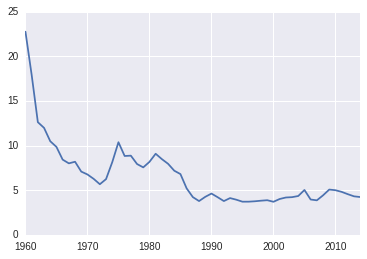

In [67]:
me_na_export_new['France'].plot()

#### See that Iraq had a tremendous spike starting around 1990! This seems to correlate historically with things like the fall of the Berlin Wall and the end of the Iran/Iraq war. The trade rate sharply decreases around the time of Bush Jrs. Iraq war

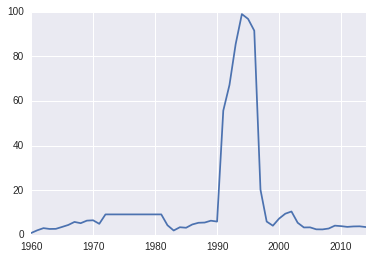

In [37]:
me_na_export_new['Iraq'].plot()

#### Syria did not historically have a particulary high rate of trade in the Arab World. However after the current president Assad rose to power in 2000, and after the start of Bush Jrs. war in Iraq, there was a dramatic spike that continued until the recent violent conflicts

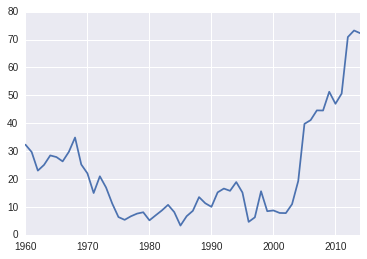

In [38]:
me_na_export_new['Syrian Arab Republic'].plot()

#### Turkey has a spike in the 1980s that seems similar to the spikes in the US and the Euro Area around that time. Similar to Syria, the rise to power of Erdogan in 2003 and the Iraq war at that time were followed by a fairly dramatic spike in trade

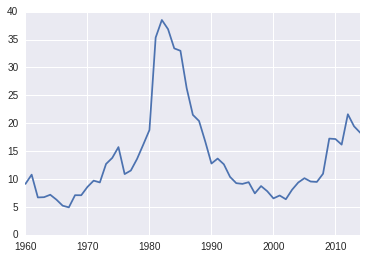

In [39]:
me_na_export_new['Turkey'].plot()

#### Iran also has a spike in the 1980s, which seems like it could potentially correlate with some of the other spikes, but is also likely an effect of the Iraq/Iran war given the timing. The trade rate for Iran also spiked a bit after the 2000s Iraq War but not as much as in the more volatile countries

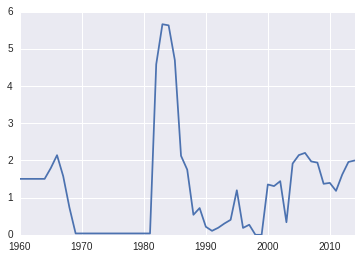

In [40]:
me_na_export_new['Iran, Islamic Rep.'].plot()

In [41]:
greenhouse_values = wdi_data[wdi_data['Indicator Name']=='Total greenhouse gas emissions (kt of CO2 equivalent)'][years[10:-3]].transpose()

In [42]:
greenhouse_values.columns = list(me_na_export_countries)

In [43]:
greenhouse_values.isnull().values.any()

True

In [44]:
def impute_nans(in_values):
    out_values = in_values.apply(pd.Series.interpolate)
    out_values = out_values.bfill()
    out_values = out_values.dropna(axis=1,how='all')
    return out_values

In [45]:
greenhouse_new_values = impute_nans(greenhouse_values)

In [46]:
greenhouse_new_values.isnull().values.any()

False

In [47]:
green_stats = greenhouse_new_values.describe()
green_means = [(green_stats[k].mean(),k) for k in green_stats.keys()]

#### Use the same methods I created for analyzing the Arabic trade data to fill in the NaN values for greenhouse gas emissions. My first insight is that this metric is clearly not useful because population is not taken into account, and therefore larger countries almost always have larger emissions. For this reason I also download the world population data from http://data.worldbank.org/indicator/SP.POP.TOTL?end=2015&start=1960&year_low_desc=true

In [48]:
green_means.sort(reverse=True)
print green_means[:40]

[(29496615.356564932, 'World'), (18164664.664539509, 'IDA & IBRD total'), (17598375.990020543, 'Low & middle income'), (15700065.744345037, 'Middle income'), (14223826.323768105, 'IBRD only'), (11825950.818332305, 'High income'), (11623625.031092919, 'OECD members'), (11300193.951255877, 'Post-demographic dividend'), (10756467.68366248, 'Upper middle income'), (9891159.1336273812, 'Late-demographic dividend'), (8339625.5368131911, 'East Asia & Pacific'), (7719047.189642461, 'Europe & Central Asia'), (6241975.4825265128, 'East Asia & Pacific (excluding high income)'), (6149514.6012211181, 'East Asia & Pacific (IDA & IBRD countries)'), (5917824.8314923616, 'Early-demographic dividend'), (5323675.6209384575, 'North America'), (5127451.7913324377, 'Lower middle income'), (4768786.5823581722, 'United States'), (4288153.5699889539, 'China'), (4198481.2400857024, 'European Union'), (4073848.5552966613, 'Europe & Central Asia (IDA & IBRD countries)'), (3800473.9271926489, 'IDA total'), (368677

In [49]:
print green_means[40:100]

[(1281672.7768932795, 'India'), (1260123.0275337757, 'Indonesia'), (1203222.2921278104, 'Middle East & North Africa'), (1119856.4786852263, 'Arab World'), (1035753.7339778799, 'Central Europe and the Baltics'), (957558.08285907714, 'IDA blend'), (957483.84638837771, 'Japan'), (900183.78901992342, 'Germany'), (838669.99073738186, 'Congo, Dem. Rep.'), (735922.02481729107, 'Middle East & North Africa (excluding high income)'), (735922.02481729107, 'Middle East & North Africa (IDA & IBRD countries)'), (575079.80688063975, 'Canada'), (562056.80684985034, 'United Kingdom'), (537981.91151156393, 'Australia'), (506911.64520443964, 'Myanmar'), (478094.81848467968, 'Ukraine'), (445405.11073637032, 'France'), (378370.00303850276, 'Poland'), (372766.43864402646, 'Mexico'), (369414.20257414994, 'Italy'), (291700.05727558018, 'Korea, Rep.'), (286892.43731563282, 'South Africa'), (284734.80319975619, 'Iran, Islamic Rep.'), (237765.14338416356, 'Spain'), (236666.41492726107, 'Central African Republic'

In [50]:
pop_data = pd.read_csv('data/API_SP.POP.TOTL_DS2_en_csv_v2.csv')

In [51]:
pop_values = pop_data[years[10:-3]].transpose()

In [52]:
pop_values.columns = list(me_na_export_countries)
pop_new_values = impute_nans(pop_values)

In [53]:
pop_new_values.isnull().values.any()

False

In [54]:
norm_greenhouse_values = greenhouse_new_values.divide(pop_new_values)
norm_greenhouse_new_values = impute_nans(norm_greenhouse_values)

In [55]:
norm_green_stats = norm_greenhouse_new_values.describe()
norm_green_means = [(norm_green_stats[k].mean(),k) for k in norm_green_stats.keys()]

#### After cleaning up the greenhouse gas emissions data the trends are fairly clear. Low and middle income countries are more likely to emit more greenhouse gases. However some higher income countries are also high emitters in the period between 1970-2012, including the United Kingdom, Spain and the US. When looking at the historical trends, it is clear that both the United Kingdom and Spain had high emissions in the 1970s and have since dramatically decreased their emissions. The US, however, is still a high emitter of greenhouse gases.

In [56]:
norm_green_means.sort(reverse=True)
print norm_green_means[:40]

[(292.54729314459553, 'Low & middle income'), (94.624363634798073, 'Europe & Central Asia (excluding high income)'), (83.045289989880985, 'China'), (64.172219302265361, 'Europe & Central Asia (IDA & IBRD countries)'), (54.47134043900936, 'United States'), (46.247197404079472, 'United Kingdom'), (45.692950031164365, 'India'), (24.853360628767049, 'Spain'), (23.683720770458553, 'Late-demographic dividend'), (19.341342297942987, 'Least developed countries: UN classification'), (18.627266032303748, 'Arab World'), (16.309382541258525, 'Netherlands'), (16.162852910661066, 'Middle income'), (15.12428150636849, 'Latin America & Caribbean'), (12.876580352412287, 'Sub-Saharan Africa (IDA & IBRD countries)'), (12.095577662494938, 'Sub-Saharan Africa (excluding high income)'), (10.153572418406039, 'World'), (9.9832582740860705, 'Ukraine'), (9.8527998608188749, 'Middle East & North Africa'), (9.6373120759396294, 'East Asia & Pacific (IDA & IBRD countries)'), (9.218514616447079, 'South Africa'), (8.

#### China is by far the biggest emitter of greenhouse gases per person, with a 2012 rate that is almost four times as high as the next closest country

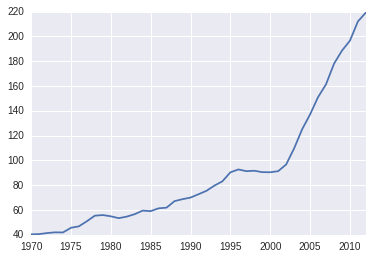

In [57]:
norm_greenhouse_values['China'].plot()

#### India is the second worst individual country, but the 2012 rate is comparable with the US rate (which I will mention later)

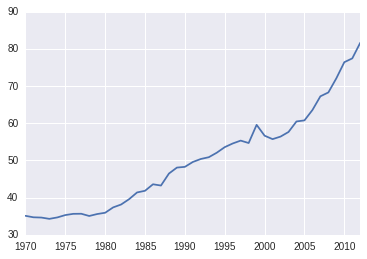

In [61]:
norm_greenhouse_values['India'].plot()

#### On average in the Arab world greenhouse gas emissions have been increasing, but the rate per person is much lower than countries like the US, China and India. Conflict in Iraq and Syria also seem to have dramatically decreased the rate of greenhouse gas emissions in those countries. Iran also recently had a dramatic decrease in emissions around 2007-2008.

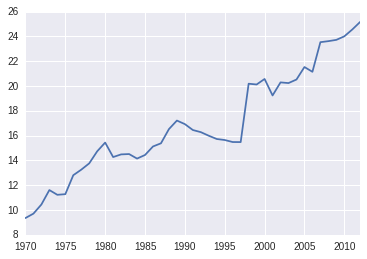

In [62]:
norm_greenhouse_values['Arab World'].plot()

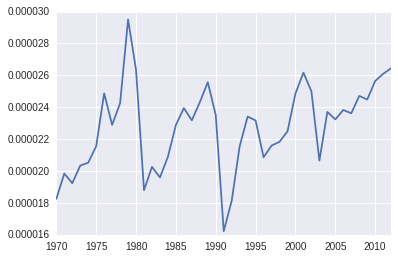

In [63]:
norm_greenhouse_values['Iraq'].plot()

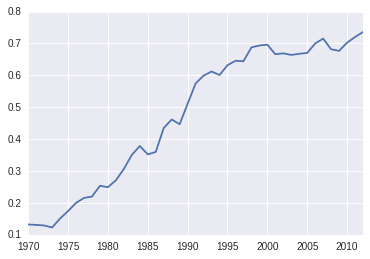

In [64]:
norm_greenhouse_values['Syrian Arab Republic'].plot()

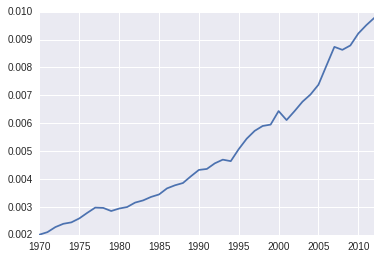

In [65]:
norm_greenhouse_values['Turkey'].plot()

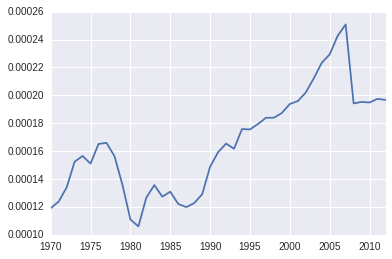

In [66]:
norm_greenhouse_values['Iran, Islamic Rep.'].plot()

#### Although the greenhouse gas emission per person has decreased from about 85 kt/person in the 1970s (approximately the same as the current rate in India), it started increasing again starting in the late 80s, and has fluctuated between 60-65 kt/person in the last decade.

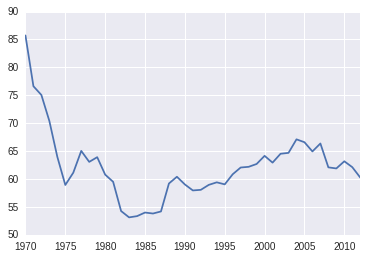

In [58]:
norm_greenhouse_values['United States'].plot()

#### Other countries that had high average rates of emissions over the period from 1970-2012 have dramatically decreased their emissions since 1970 and now have rates that are 3 or more times lower than the US rate

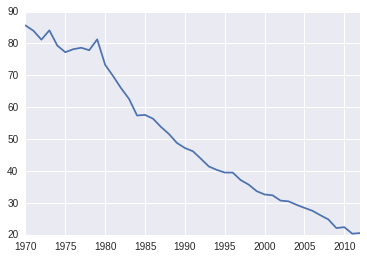

In [59]:
norm_greenhouse_values['United Kingdom'].plot()

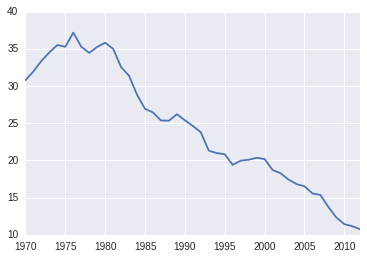

In [60]:
norm_greenhouse_values['Spain'].plot()

#### Actual time usage
#### 1st hour - Tried to think about useful ways to consider all the different indicator names. At first I tried counting them based on country or year and realized the data is just two large. I investigated the distribution of gender classifiers, which seemed to make up a large proportion of the indicators. Finally I settled on using a word count vectorizer to try to determine what the most common topics were. 
#### 2nd hour - Found a few interesting topics in the most common word list (male and female turned up as expected, but also found agriculture, trade/manufacturing and energy). Looked through the indicators in these topics to find the ones I thought were most interesting. Then started selecting these indicators in pandas and getting their year and country information.
#### 3rd hour - Spend a lot of time learning new fun things to do with pandas (how to get mean, median etc from describe(), how to use info(), how to find NaN values and some different ways to impute them or remove them). Look at indicator 'Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)'. Find that historically US and Europe used to be dominant trade partners, but integrated over time most of the trade partners are other countries in the Middle East and North Africa. Also see spikes in Iraq and Syria corresponding to rule of tyrannical dictators (Hussein (who began his rule in 1979 but was embroiled in a war in Iran from about 1980-1990, which also seems to have caused a spike for Iran), Assad in 2000 and Erdogan in 2003) that in several cases almost immediately precluded major wars (Iraq and Syrian wars). Would be good to fit this with historical data (especially things like wars, the fall of the Berlin wall, major political leadership changes) if I had more time.
#### 4th hour - Start looking at greenhouse gases. Initially see that the largest output of greenhouse gasses come from countries that are low and middle income(IDA and IBRD are the absolute poorest countries). It is somewhat difficult to interpret though because these are all aggregate data (and the total number of countries aggregated is not explicitly given in this dataset). It quickly becomes clear that this information is *EXTREMELY* dependent on factors like the population of the region that is describe, and that this is not the right metric for comparing different countries (unlike previous indicator, which was a percentage, and therefore took into account the differences in export rates of different countries). So I then get the population information from http://data.worldbank.org/indicator/SP.POP.TOTL?end=2015&start=1960&year_low_desc=true . After normalizing by population it is *VERY* clear that the worst greenhouse gas emitters are poor countries (including China and India). Less poor countries also make the list (US,UK, Spain etc.), but looking at their data, this seems to be mostly because of historical highs in the 70s). Would be good to fit this with additional data about GDP over time if I had more time
#### 5th hour - Write up final insights and comment my jupyter notebook to make my data story